In [75]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn import datasets, svm, metrics


In [17]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [18]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


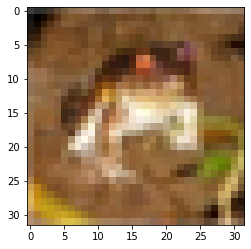

In [19]:
plt.imshow(X_train[0])

In [20]:
print(Y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [21]:
classes = ['airplan','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [22]:
Y_train = Y_train.ravel() #coverted into 1D

In [23]:
print(Y_train[:5])

[6 9 9 4 1]


In [24]:
X_train = X_train/255
X_test = X_test/255    #normalize into 0 to 1 range


In [26]:
#making a convolution neural network

In [40]:
from keras.layers.core.flatten import Flatten
model = Sequential()


model.add(Conv2D(32, (3, 3), padding="same", activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(16,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))



In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8948 - accuracy: 0.6851
Epoch 2/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8772 - accuracy: 0.6914
Epoch 3/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8654 - accuracy: 0.6959
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8528 - accuracy: 0.7009
Epoch 5/50
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8443 - accuracy: 0.7032
Epoch 6/50
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8300 - accuracy: 0.7077
Epoch 7/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8187 - accuracy: 0.7124
Epoch 8/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8144 - accuracy: 0.7132
Epoch 9/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8048 - accuracy: 0.7184
Epoch 10/50
1563/1563 [==============================] - 64s 41m

In [56]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9450 - accuracy: 0.6924


[0.9450412392616272, 0.6923999786376953]

In [59]:
Y_test = Y_test.ravel()

In [61]:
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [63]:
Y_pred = model.predict(X_test)

In [65]:
Y_pred[:5]

array([[6.17057231e-05, 2.44934768e-06, 1.36540388e-03, 9.77138162e-01,
        1.32814557e-05, 1.28503954e-02, 4.51438827e-03, 2.55136129e-05,
        3.98949347e-03, 3.92629227e-05],
       [6.23272383e-04, 1.09273067e-03, 1.01219248e-05, 3.26700786e-07,
        1.08923466e-07, 2.61417803e-08, 4.33537571e-06, 5.15962162e-10,
        9.98257339e-01, 1.17711252e-05],
       [1.55819744e-01, 1.15190811e-01, 1.13484019e-03, 9.18304431e-04,
        3.23724747e-03, 4.27205814e-04, 1.75491532e-05, 1.37788628e-03,
        6.65226460e-01, 5.66499531e-02],
       [8.02654326e-01, 9.52681119e-04, 8.52851477e-03, 2.52495694e-04,
        6.40850002e-03, 1.50397827e-04, 4.47482686e-04, 5.33140228e-05,
        1.79201171e-01, 1.35108037e-03],
       [2.90188063e-06, 2.21743420e-07, 3.12201981e-03, 4.52763634e-03,
        5.05061541e-03, 3.52022820e-04, 9.86942530e-01, 1.99450071e-07,
        1.40631641e-06, 4.10903908e-07]], dtype=float32)

In [66]:
Y_classes = [np.argmax(element) for element in Y_pred]

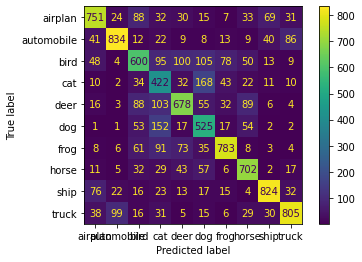

In [88]:
confusion_matrix = metrics.confusion_matrix(Y_classes, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classes)

cm_display.plot()
plt.show()